# Trabalho de Aplicação Geoespacial: 

## Modelagem 

### Importação da bibliotecas: 

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
#import fiona

pd.set_option("display.max_columns", 137)
import geopandas as gpd

#import shapefile as shp
#import shapely
#from shapely import geometry
from esda.moran import Moran, Moran_Local
from splot.esda import moran_scatterplot, plot_moran, lisa_cluster

sns.set(style="whitegrid")

import tqdm

import warnings
warnings.filterwarnings("ignore")

Importação do shapefile dos municípios brasileiros _(fonte: ftp.ibge):_

In [3]:
shp_path = 'C:\\Users\\larii\\Desktop\\Trabalho_Geoespacial\\Bases\\BRMUE250GC_SIR.shp'
#shp.Reader(shp_path)
#df_shp_in = fiona.open(shp_path)
df_shp = gpd.read_file(shp_path)
df_shp.columns = ['NM_MUNICIP', 'CO_MUNICIPIO_RESIDENCIA', 'geometry']

In [4]:
import pysal as ps

Importando a base com indicadores agregados por município:

In [5]:
#df_municipio = pd.read_pickle('C:\\Users\\larii\\Desktop\\Trabalho_Geoespacial\\Bases\\df_municipio_2')

#Se for usar 2019:
df_municipio = pd.read_pickle('C:\\Users\\larii\\Desktop\\Trabalho_Geoespacial\\Bases\\df_municipio_2019')

Join entre o shapefile e indicadores de municípios:

In [53]:
df_auto = df_shp.merge(df_municipio, how='inner', on='CO_MUNICIPIO_RESIDENCIA')

In [54]:
df_auto['TOTAL'] = df_auto.TOTAL/df_auto['População total 2010']
df_auto.sort_values('CO_MUNICIPIO_RESIDENCIA', inplace=True)


In [55]:
df_auto.drop(['NM_MUNICIP'], axis=1, inplace=True)

## Exploratory Data Analysis(EDA) 

1. Avaliação das features com maior correlação com as Notas (CN, CH, MT, LC, REDACAO):

In [9]:
col_notas = df_auto.columns[['NOTA' in x for x in df_auto.columns]]

In [10]:
corr =df_auto.corr()

In [11]:
y_selecionado = 'NU_NOTA_CH_mean'

In [12]:
corr = corr[['NU_NOTA_CN_mean', 
       'NU_NOTA_CH_mean', 
       'NU_NOTA_LC_mean', 
       'NU_NOTA_MT_mean', 
       'NU_NOTA_REDACAO_mean']]#.drop(col_notas, axis=0)
corr.drop(col_notas, axis=0, inplace=True)

Só trocar o nome da feature do código abaixo:

In [13]:
interesse = corr.sort_values(y_selecionado, ascending=False)[:10][y_selecionado].index

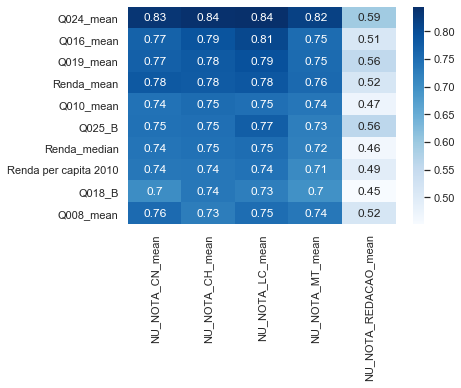

In [14]:
sns.heatmap(corr.loc[interesse], cmap='Blues',annot=True)

# Auto-correlação espacial: 

### Criação das weight matrix 

In [15]:
%%time
#qW =ps.lib.weights.Queen.from_dataframe(df = df_auto, idVariable='CO_MUNICIPIO_RESIDENCIA',  geom_col = 'geometry')
#rW =ps.lib.weights.Rook.from_dataframe(df_auto)
qW =ps.lib.weights.Queen.from_dataframe(df_auto)

Wall time: 3min 4s


### Quais são as features mais auto-correlacionadas espacialmente? 

In [16]:
morans = []
for col in df_auto.columns[4:]:
    moran = Moran(df_auto[col], qW)
    morans.append(moran.I)
    
f_morans = pd.DataFrame({'Feature' : df_auto.columns[4:],
                         'Morans_I' : morans}).sort_values('Morans_I', ascending=False).reset_index(drop=True)
f_morans[:20]

('WARNING: ', 1525, ' is an island (no neighbors)')
('WARNING: ', 3499, ' is an island (no neighbors)')


,Feature,Morans_I
0,Q014_mean,0.926838
1,Q010_mean,0.912248
2,Q014_median,0.885304
3,Q018_B,0.883347
4,Q018_A,0.883347
5,Q016_mean,0.881678
6,Q013_mean,0.868800
7,Q015_mean,0.843091
8,Q010_median,0.838811
9,Q006_B,0.837936


### Plotando o I de Moran para a variável dependente: 

1. Avaliando Auto_correlação espacial de: NU_NOTA_MT_mean

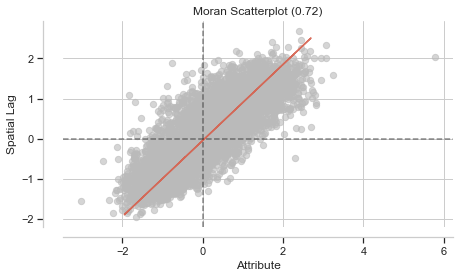

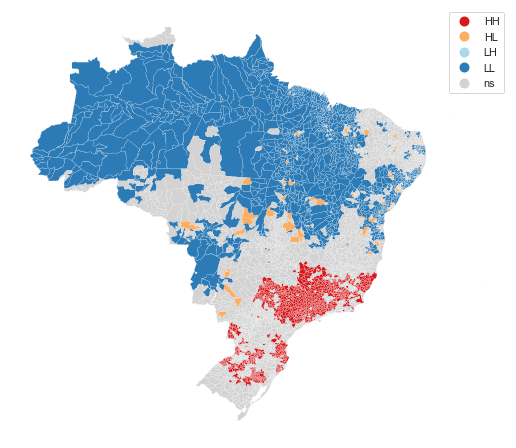

In [17]:
moran = Moran(df_auto.NU_NOTA_MT_mean, qW)
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()
#Para LISA CLUSTER:
moran_loc = Moran_Local(df_auto.NU_NOTA_MT_mean, qW)
lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
plt.show()

2. Avaliando Auto_correlação espacial de: NU_NOTA_CN_mean

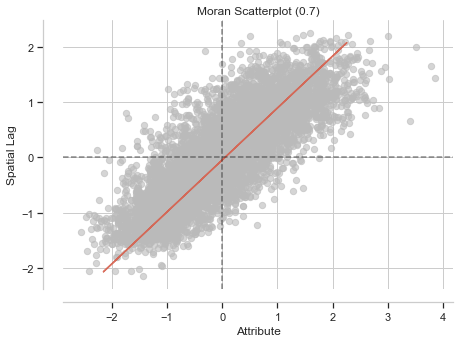

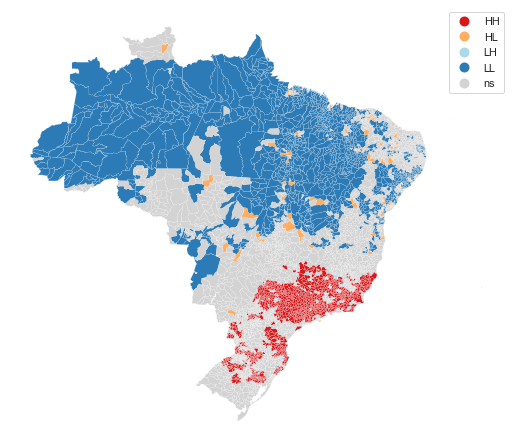

In [18]:
moran = Moran(df_auto.NU_NOTA_CN_mean, qW)
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()
#Para LISA CLUSTER:
moran_loc = Moran_Local(df_auto.NU_NOTA_CN_mean, qW)
lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
plt.show()

3. Avaliando Auto_correlação espacial de: NU_NOTA_CH_mean

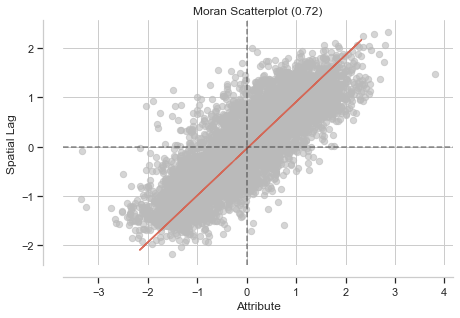

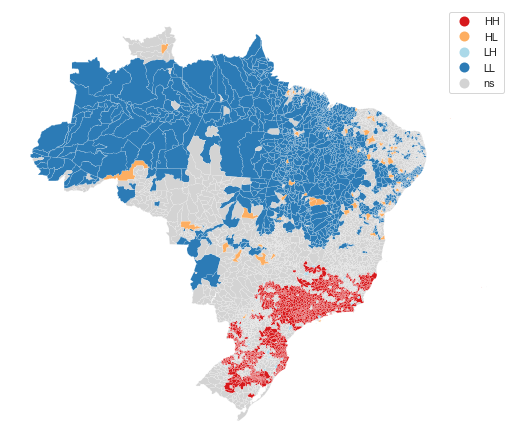

In [19]:
moran = Moran(df_auto.NU_NOTA_CH_mean, qW)
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()
#Para LISA CLUSTER:
moran_loc = Moran_Local(df_auto.NU_NOTA_CH_mean, qW)
lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
plt.show()

4. Avaliando Auto_correlação espacial de: NU_NOTA_LC_mean

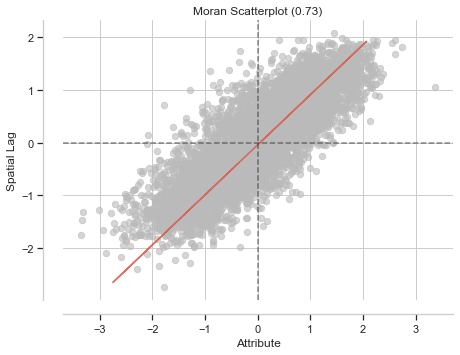

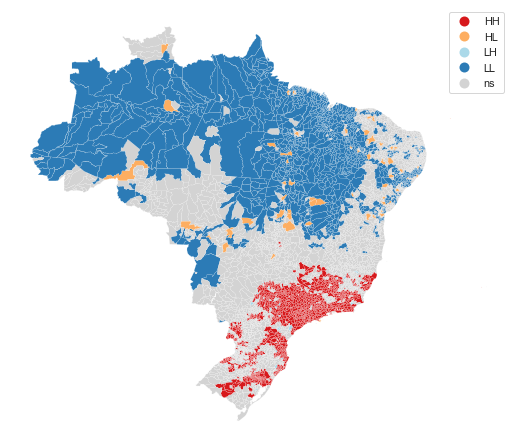

In [20]:
moran = Moran(df_auto.NU_NOTA_LC_mean, qW)
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()
#Para LISA CLUSTER:
moran_loc = Moran_Local(df_auto.NU_NOTA_LC_mean, qW)
lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
plt.show()


5. Avaliando Auto_correlação espacial de: NU_NOTA_REDACAO_mean

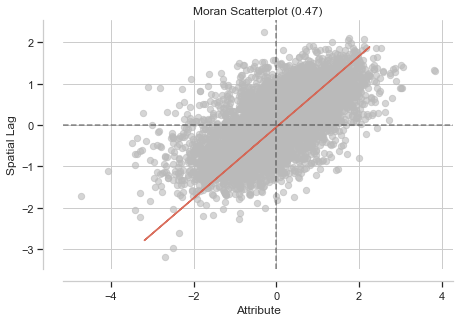

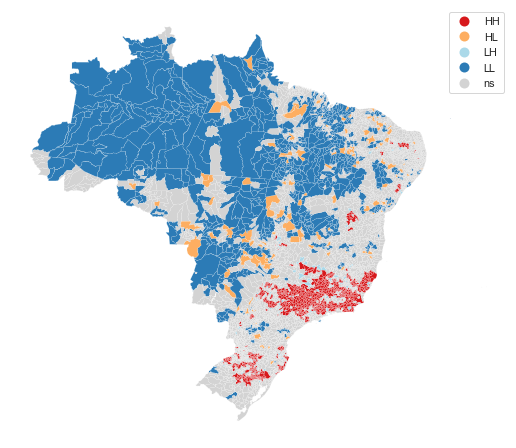

In [21]:
moran = Moran(df_auto.NU_NOTA_REDACAO_mean, qW)
fig, ax = moran_scatterplot(moran, aspect_equal=True)
plt.show()

#Para LISA CLUSTER:
moran_loc = Moran_Local(df_auto.NU_NOTA_REDACAO_mean, qW)
lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
plt.show()

### Ou qualquer outro atributo: 

In [78]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [29]:
def moran_lisa(Feature, LISA):
    moran = Moran(df_auto[Feature], qW)
    fig, ax = moran_scatterplot(moran, aspect_equal=True)
    plt.show()

    #Para LISA CLUSTER:
    if LISA:
        moran_loc = Moran_Local(df_auto[Feature], qW)
        lisa_cluster(moran_loc, gpd.GeoDataFrame(df_auto, geometry='geometry'),figsize = (9,9))
        plt.show()
    
interact(moran_lisa, Feature=df_auto.columns[df_auto.dtypes=='float64'], LISA=True)


interactive(children=(Dropdown(description='Feature', options=('TP_LINGUA_0', 'TP_LINGUA_1', 'Q001_A', 'Q001_B…

<function __main__.moran_lisa(Feature, LISA)>

### Outro gráfico útil, que une as duas visões: 

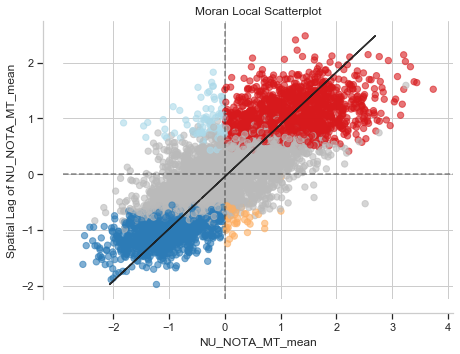

In [24]:
moran_loc = Moran_Local(df_auto.NU_NOTA_MT_mean, qW)
fig, ax = moran_scatterplot(moran_loc, p=0.05)
ax.set_xlabel('NU_NOTA_MT_mean')
ax.set_ylabel('Spatial Lag of NU_NOTA_MT_mean')
plt.show()

# Modelagem: 

## Regressão Linear (Baseline) 

Vamos preparar o scaling para conseguir avaliar os coeficientes:

In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#scaler = MinMaxScaler()
scaler = StandardScaler()

### Dataprep básico:
#### Algumas features têm variância igual a zero.

In [56]:
col_notas = list(df_auto.columns[['NOTA' in x for x in df_auto.columns.values]])
to_drop = col_notas
df_auto_2 = df_auto.drop(to_drop, axis=1)

In [57]:
describe_df_auto = df_auto.describe().T.reset_index()
to_drop = describe_df_auto[describe_df_auto['std']==0]['index'].values
df_auto_2 = df_auto.drop(to_drop, axis=1)

In [58]:
col_index = df_auto.columns[:3]
to_drop = col_index
df_auto_2 = df_auto_2.drop(to_drop, axis=1)

### Prep:

In [59]:
cols_X_inicial = [
       'NU_IDADE_mean', 'NU_IDADE_median', 'NU_IDADE_std', 'Q005_mean',
       'Q005_median', 'Q005_std', 'Q007_mean', 'Q007_std', 'Q008_mean',
       'Q008_median', 'Q008_std', 'Q009_mean', 'Q009_median', 'Q009_std',
       'Q010_mean', 'Q010_median', 'Q010_std', 'Q011_mean', 'Q011_median',
       'Q011_std', 'Q012_mean', 'Q012_std', 'Q013_mean', 'Q013_median',
       'Q013_std', 'Q014_mean', 'Q014_median', 'Q014_std', 'Q015_mean',
       'Q015_median', 'Q015_std', 'Q016_mean', 'Q016_median', 'Q016_std',
       'Q017_mean', 'Q017_std', 'Q019_mean', 'Q019_median', 'Q019_std',
       'Q022_mean', 'Q022_median', 'Q022_std', 'Q024_mean', 'Q024_median',
       'Q024_std', 'Renda_mean', 'Renda_median', 'Renda_std','TOTAL',
       'Q001_A', 'Q001_B', 'Q001_C',
       'Q001_D', 'Q001_E', 'Q001_F', 'Q001_G', 
       'Q002_A', 'Q002_B', 'Q002_C', 'Q002_D', 'Q002_E', 'Q002_F', 'Q002_G',
       'Q003_A', 'Q003_B', 'Q003_C', 'Q003_D', 'Q003_E',
       'Q004_A', 'Q004_B', 'Q004_C', 'Q004_D', 'Q004_E',
       'Q018_A',
       'Q020_A',  
       'Q021_A', 
       'Q023_A',  
       'Q025_A', 
       
       'Índice de Theil - L 2010',
       'Índice de Gini 2010',
       '% da população em domicílios com água encanada 2010',
       '% da população em domicílios com banheiro e água encanada 2010',
       '% da população em domicílios com coleta de lixo 2010',
       '% da população em domicílios com energia elétrica 2010',
       '% de pessoas em domicílios com paredes inadequadas 2010',
       '% de pessoas em domicílios com abastecimento de água e esgotamento sanitário inadequados 2010',
       'IDHM 2010', 'IDHM Renda 2010', 'IDHM Longevidade 2010',
       'IDHM Educação 2010', 'Renda per capita 2010',
        'IFDM','Emprego & Renda', 'Educação', 'Saúde', 'População total 2010']

### Análise de Multicolinearidade: 

Aqui temos a modelagem de fato, na qual vamos:
- Identificar ponto (quantidade de features) queo VIF passa de 10;
- Mostrar a queda em Akaike;
- Mostrar as features que apresentam maiores importâncias;
- Mostrar ganho do modelo espacial

In [60]:
col_notas = ['NU_NOTA_CN_mean',
 'NU_NOTA_CH_mean',
 'NU_NOTA_LC_mean',
 'NU_NOTA_MT_mean',
 'NU_NOTA_REDACAO_mean']


In [51]:
#para corrigir bugde 2019:
df_auto.drop(['IFDM', 'Emprego & Renda', 'Educação', 'Saúde'], axis=1, inplace=True)

In [61]:
y_selecionado = 'NU_NOTA_REDACAO_mean'

corr = df_auto[col_notas + cols_X_inicial].corr()
corr.drop(['IFDM', 'Emprego & Renda', 'Educação', 'Saúde'], axis=1, inplace=True)
corr.drop(col_notas, axis=0,inplace=True)
corr = corr.dropna()**2
maiores_corrs = corr[y_selecionado].sort_values(ascending=False)
cols_X = list(maiores_corrs.index)

In [63]:
%%time
cols_X=[]
n_features = []
nova_feature = []
r2 = []
aic = []
colinearidade = []
rmse = []
breusch_pagan=[]
aic_atual= 0
for i in tqdm.tqdm_notebook(range(len(maiores_corrs))):
    try:
        for feature in maiores_corrs.index:
            try:
                if feature not in cols_X:
                    cols_X_temp = cols_X + [feature] 
                    y = df_auto[[y_selecionado]].values

                    X = df_auto[cols_X_temp]
                    X_scaled = scaler.fit_transform(X)
                    name_x = list(X.columns.values)
                    X = X.values
                    model = ps.model.spreg.OLS(y, X_scaled, w=qW, name_x = name_x, spat_diag=True)

                    if (model.aic < aic_atual) | (aic_atual==0):
                        aic_atual = model.aic
                        feature_escolhida = feature
            except:
                pass

        cols_X.append(feature_escolhida)
        X = df_auto[cols_X]
        X_scaled = scaler.fit_transform(X)
        name_x = list(X.columns.values)
        X = X.values
        model = ps.model.spreg.OLS(y, X_scaled, name_x = name_x)

        n_features.append(i)
        nova_feature.append(feature_escolhida)
        r2.append(model.ar2)
        aic.append(model.aic)
        colinearidade.append(model.mulColli)
        rmse.append(model.utu)
        breusch_pagan.append(model.breusch_pagan['pvalue'])
    except:
        pass

resumo = pd.DataFrame({'N_features':n_features,
                       'Nova_feature':nova_feature,
                       'R2_Adjusted':r2,
                      'AIC':aic,
                      'VIF':colinearidade,
                      'RMSE':rmse,
                      'breusch_pagan':breusch_pagan}
                     )
   


Wall time: 6min 35s


### Avaliando Multicolinearidade: 
#### VIF < 10

(0, 50)

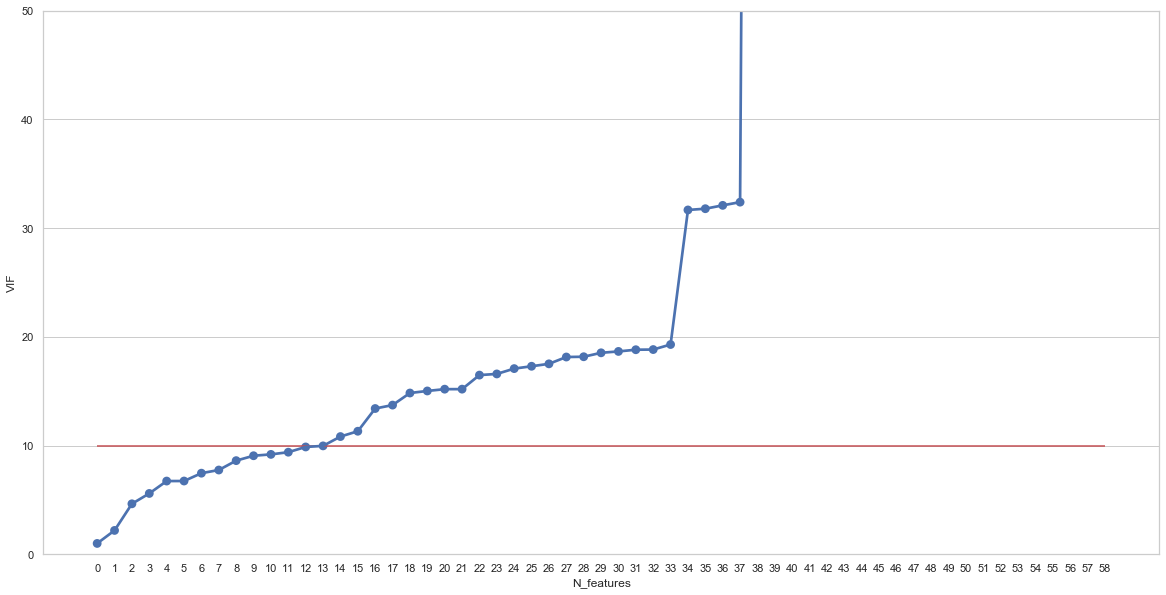

In [64]:
plt.figure(figsize= (20,10))
sns.pointplot(x = resumo.N_features,
             y = resumo.VIF)
plt.hlines(y=10, xmin=0, xmax=58, color = 'r')
plt.ylim([0,50])

Assim, ficaríamos com n features:

In [65]:
numero_de_features = resumo[resumo.VIF<10].shape[0]
numero_de_features

14

### Olhando o corte em Akaike: 

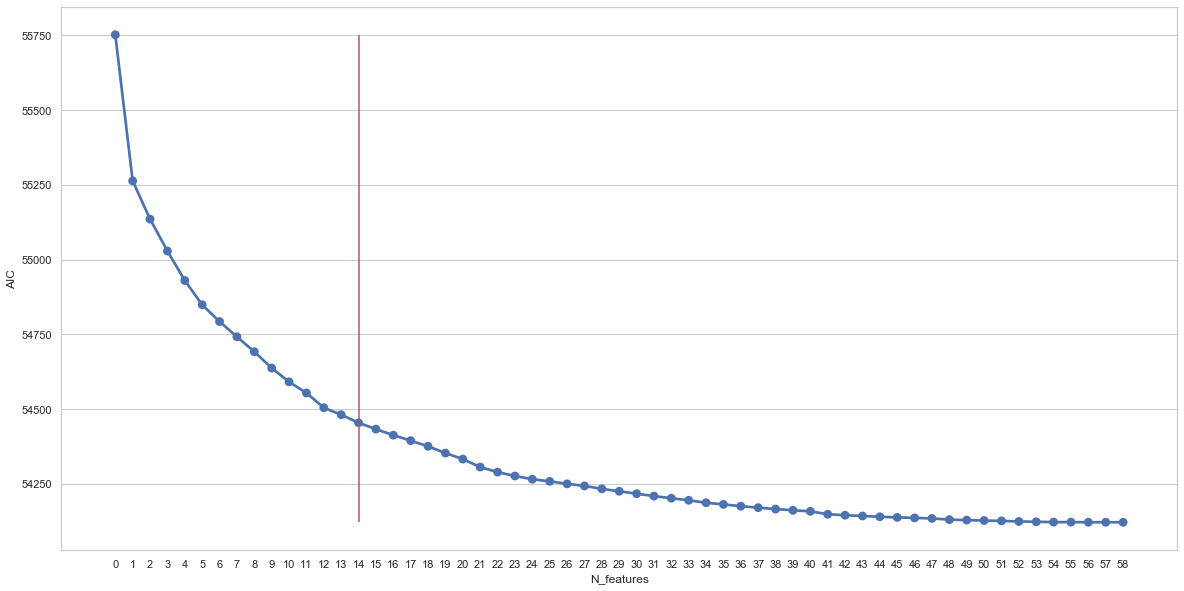

In [66]:
plt.figure(figsize= (20,10))
sns.pointplot(x = resumo.N_features,
             y = resumo.AIC)
plt.vlines(x=numero_de_features, ymin=resumo.AIC.min(), ymax=resumo.AIC.max(), color = 'r')

In [67]:
resumo_final = resumo[:numero_de_features]
resumo_final

,N_features,Nova_feature,R2_Adjusted,AIC,VIF,RMSE,breusch_pagan
0,0,Q024_mean,0.353027,55752.235536,1.000000,7.245804e+06,7.775273e-02
1,1,Q015_mean,0.407469,55263.623814,2.195526,6.634886e+06,8.673421e-10
2,2,Q014_mean,0.421027,55135.690489,4.645164,6.481903e+06,3.957038e-09
3,3,Q025_A,0.432120,55028.935653,5.596776,6.356571e+06,1.097085e-18
4,4,Q019_mean,0.442178,54930.397313,6.736655,6.242864e+06,1.292054e-16
5,5,Q002_C,0.450344,54849.255355,6.740452,6.150370e+06,1.492247e-33
6,6,Renda_std,0.455960,54793.053738,7.461803,6.086439e+06,3.468745e-34
7,7,Q002_B,0.461001,54742.201952,7.751858,6.028960e+06,3.079673e-37
8,8,Q024_std,0.465906,54692.277090,8.615395,5.973018e+06,1.076983e-39
9,9,Q003_D,0.471212,54637.662174,9.065557,5.912614e+06,2.811696e-43


In [68]:
cols_X = resumo_final.Nova_feature.values
X = df_auto[cols_X]
X_scaled = scaler.fit_transform(X)
name_x = list(X.columns.values)
X = X.values
model = ps.model.spreg.OLS(y, X_scaled, name_x = name_x, name_y=y_selecionado,) 
valores=[]
for x in model.t_stat:
    valor = x[1]
    valores.append(valor)
df_coefs = pd.DataFrame({'Feature':model.name_x,
                         'Coefs':[x[0] for x in model.betas],
                        'pvalues':valores}).sort_values('Coefs').reset_index(drop=True)

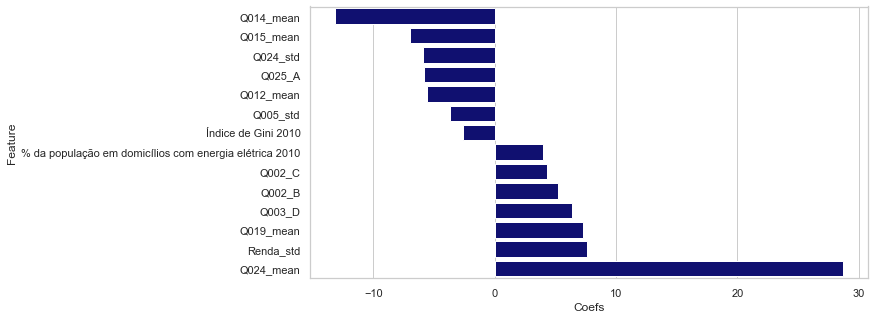

In [69]:
plt.figure(figsize= (10,5))
sns.barplot(y = df_coefs[:-1].Feature,
           x = df_coefs[:-1].Coefs,
           color = 'navy')
#plt.title(y)

In [70]:
print(model.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :     unknown
Weights matrix      :        None
Dependent Variable  :NU_NOTA_REDACAO_mean                Number of Observations:        5570
Mean dependent var  :    551.8999                Number of Variables   :          15
S.D. dependent var  :     44.8488                Degrees of Freedom    :        5555
R-squared           :      0.4875
Adjusted R-squared  :      0.4862
Sum squared residual: 5740986.815                F-statistic           :    377.4050
Sigma-square        :    1033.481                Prob(F-statistic)     :           0
S.E. of regression  :      32.148                Log likelihood        :  -27225.794
Sigma-square ML     :    1030.698                Akaike info criterion :   54481.587
S.E of regression ML:     32.1045                Schwarz criterion     :   54580.964

---------------------------------------------------------------------

## Com variável espacial 

In [71]:
w_matrix = ps.lib.weights.lag_spatial(qW, df_auto[y_selecionado])

In [72]:
y = df_auto[[y_selecionado]].values
X_w = df_auto[cols_X].copy() 
X_w['w_matrix'] = w_matrix
name_x = list(X_w.columns.values)

X_w = scaler.fit_transform(X_w)

#X_scaled = scaler.fit_transform(X_w)
#X_w = X_w.values


model_w = ps.model.spreg.OLS(y, X_w, 
                             name_ds='MICRODADOS_ENEM',
                             name_w='QUEEN_W_MUNI',
                             name_y=y_selecionado,
                             name_x = name_x, 
                             w=qW, 
                             spat_diag=True,
                            moran=True)
print(model_w.summary)

REGRESSION
----------
SUMMARY OF OUTPUT: ORDINARY LEAST SQUARES
-----------------------------------------
Data set            :MICRODADOS_ENEM
Weights matrix      :QUEEN_W_MUNI
Dependent Variable  :NU_NOTA_REDACAO_mean                Number of Observations:        5570
Mean dependent var  :    551.8999                Number of Variables   :          16
S.D. dependent var  :     44.8488                Degrees of Freedom    :        5554
R-squared           :      0.5375
Adjusted R-squared  :      0.5362
Sum squared residual: 5181147.321                F-statistic           :    430.2441
Sigma-square        :     932.868                Prob(F-statistic)     :           0
S.E. of regression  :      30.543                Log likelihood        :  -26940.040
Sigma-square ML     :     930.188                Akaike info criterion :   53912.079
S.E of regression ML:     30.4990                Schwarz criterion     :   54018.082

------------------------------------------------------------------

In [73]:
print("R2 Ajustado\n\nModelo baseline: {:.3f}\nModelo Espacial: {:.3f}".format(model.ar2,model_w.ar2))
print("Variação de: {:.2}%".format(100*(model_w.ar2-model.ar2)/model.ar2))

print("\n\nAIC\n\nModelo baseline: {:.3f}\nModelo Espacial: {:.3f}".format(model.aic,model_w.aic))
print("Variação de: {:.2}%".format(100*(model_w.aic-model.aic)/model.aic))

R2 Ajustado

Modelo baseline: 0.486
Modelo Espacial: 0.536
Variação de: 1e+01%


AIC

Modelo baseline: 54481.587
Modelo Espacial: 53912.079
Variação de: -1.0%


***

### Para ver a distribuição da feature no espaço: 

In [75]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),10))

In [76]:
colors

[<Color red>,
 <Color #f13600>,
 <Color #e36500>,
 <Color #d58e00>,
 <Color #c7b000>,
 <Color #a4b800>,
 <Color #72aa00>,
 <Color #459c00>,
 <Color #208e00>,
 <Color green>]

In [ ]:
plt.cm.Spectral(norm(df_auto[Feature].values)

In [13]:
['b' if x>=0.5 else 'r' for x in df_auto[Feature].values]

NameError: name 'Feature' is not defined

In [93]:
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=0, vmax=5000)

In [94]:
cor = cmap(norm(df_auto.Renda_mean[2]))

In [96]:
Feature = 'Renda_mean'

In [107]:
df_auto['TP_LINGUA_0'].min()

0.0

In [121]:
def cor(x, Feature):
    if x < df_auto[Feature].mean():
        cmap = plt.cm.Reds_r
        norm = matplotlib.colors.Normalize(vmin=df_auto[Feature].min(), vmax=df_auto[Feature].max())
    else:

        cmap = plt.cm.Blues
        norm = matplotlib.colors.Normalize(vmin=df_auto[Feature].min(), vmax=df_auto[Feature].max())

    return cmap(norm(x))


In [122]:
def geo_plot(Feature):
    #norm = plt.Normalize()
    colors = [cor(x, Feature) for x in df_auto[Feature].values] #['b' if x>0.5 else 'r' for x in df_auto[Feature].values] #plt.cm.Spectral(norm(df_auto[Feature].values))
    ax = df_auto.geometry.plot(figsize=(10,10), linewidth=0.0, facecolor=colors)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    plt.show()

interact(geo_plot, Feature=df_auto.columns[df_auto.dtypes=='float64'] )

interactive(children=(Dropdown(description='Feature', options=('TP_LINGUA_0', 'TP_LINGUA_1', 'Q001_A', 'Q001_B…

<function __main__.geo_plot(Feature)>

***